# Fraud Detection Model

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Fraud.csv')
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['type_encoded'] = label_encoder.fit_transform(df['type'])
df.drop(columns=['type'], inplace=True)
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_encoded
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,3
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,3
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,4
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,3


In [6]:
df.drop(columns=['nameOrig', 'nameDest'], inplace=True)
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_encoded
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,3
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,3
2,1,181.00,181.0,0.00,0.0,0.0,1,0,4
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
 7   isFlaggedFraud  int64  
 8   type_encoded    int32  
dtypes: float64(5), int32(1), int64(3)
memory usage: 412.6 MB


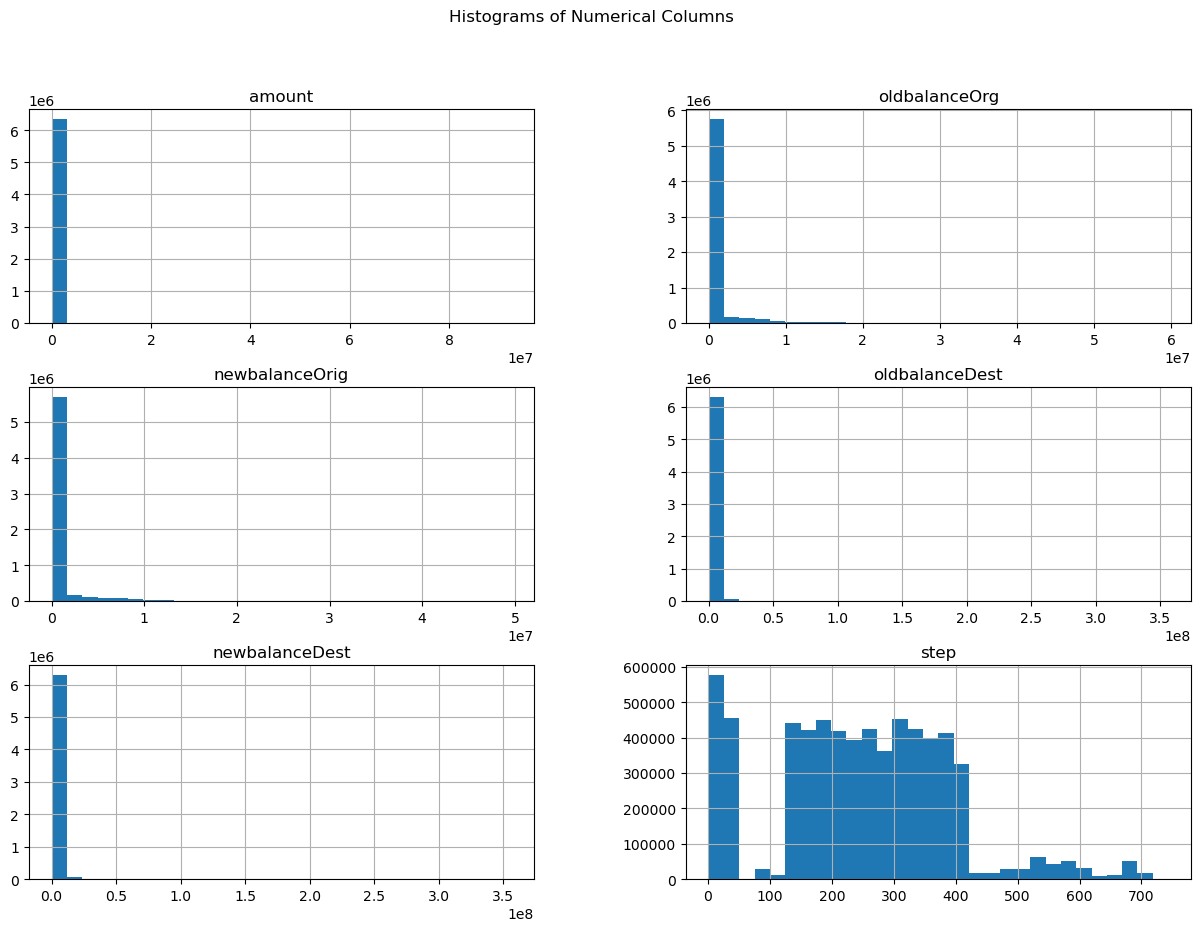

In [8]:
import matplotlib.pyplot as plt
num_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'step']
df[num_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Columns")
plt.show()

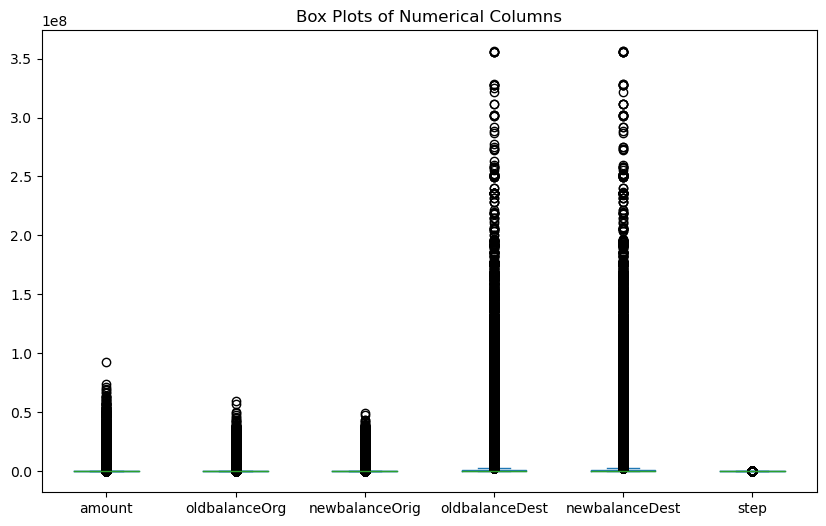

In [9]:
df[num_cols].plot(kind='box', figsize=(10, 6))
plt.title("Box Plots of Numerical Columns")
plt.show()

We can clearly see that the oldbalanceDest and newbalanceDest data has alot of outliers present in them

In [10]:
from scipy import stats
z_scores_oldbalanceDest = stats.zscore(df['oldbalanceDest'])
z_scores_newbalanceDest = stats.zscore(df['newbalanceDest'])
threshold = 3
df_no_outliers = df[(abs(z_scores_oldbalanceDest) < threshold) & (abs(z_scores_newbalanceDest) < threshold)]

<Figure size 1000x600 with 0 Axes>

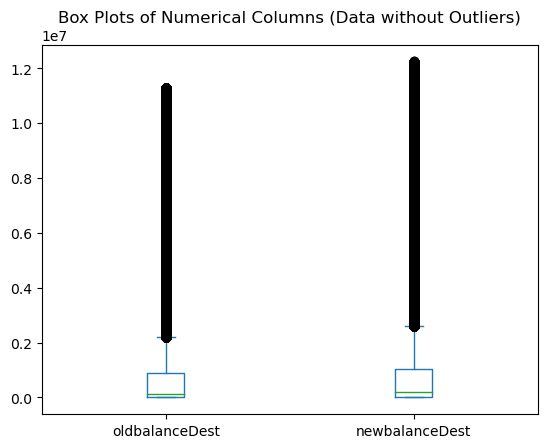

In [11]:
plt.figure(figsize=(10, 6))
df_no_outliers[['oldbalanceDest', 'newbalanceDest']].plot(kind='box')
plt.title("Box Plots of Numerical Columns (Data without Outliers)")
plt.show()

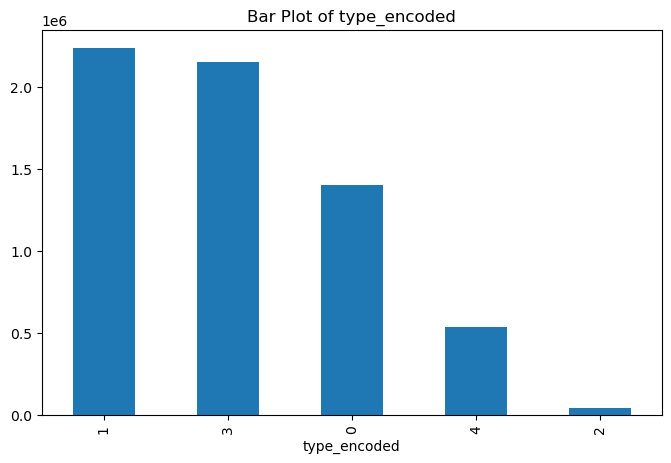

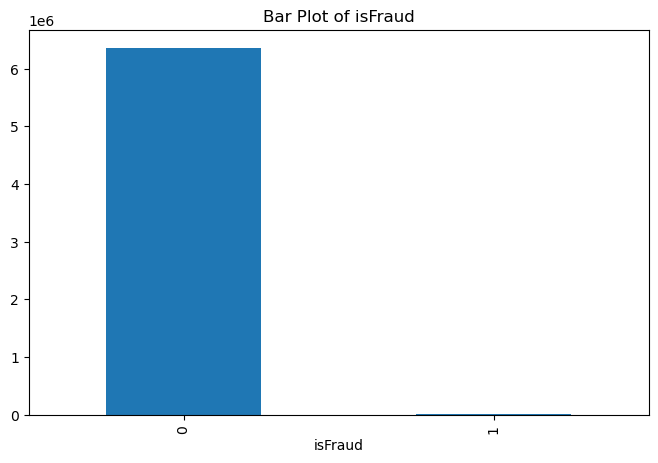

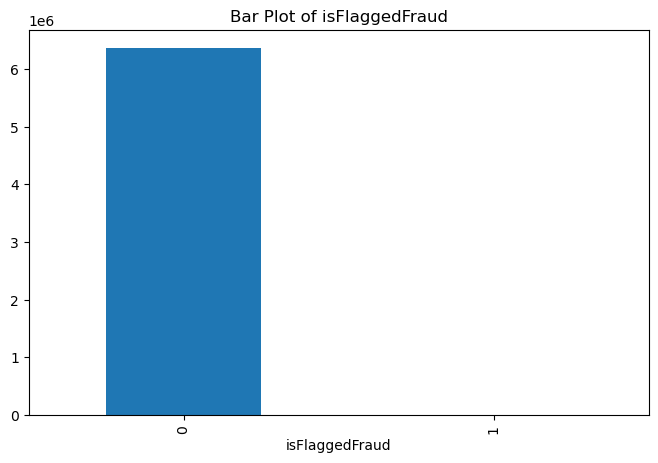

In [12]:
cat_cols = ['type_encoded', 'isFraud', 'isFlaggedFraud']
for col in cat_cols:
    df[col].value_counts().plot(kind='bar', figsize=(8, 5))
    plt.title(f"Bar Plot of {col}")
    plt.show()

Here, we can see that the data is highly imbalanced

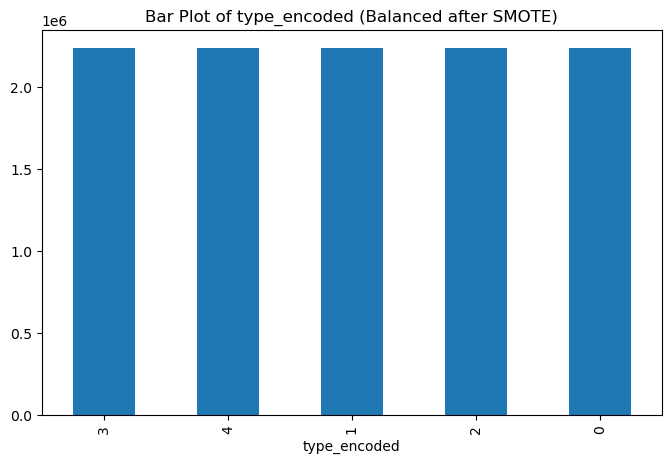

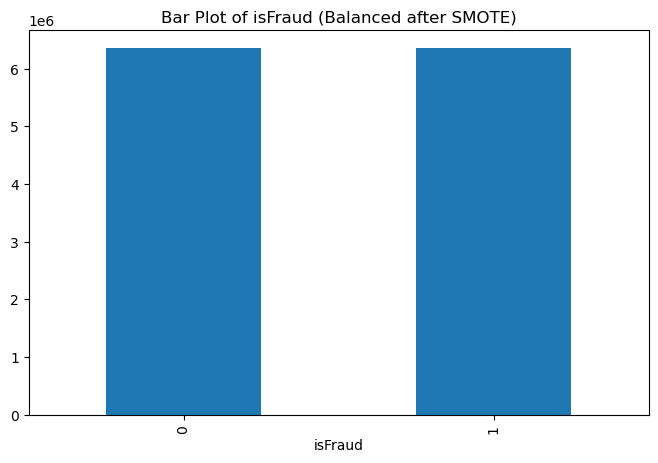

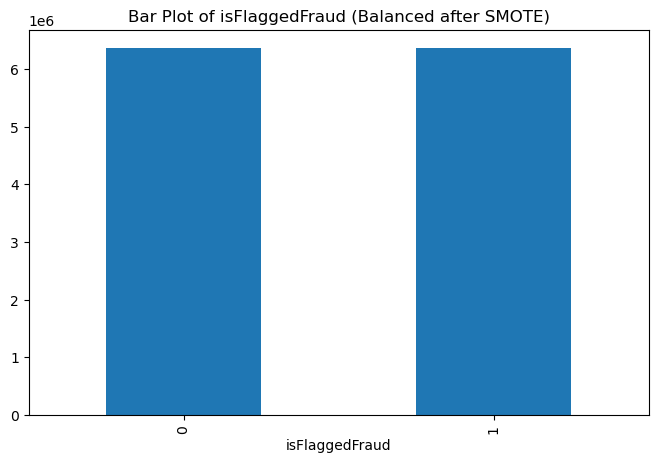

In [13]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

cat_cols = ['type_encoded', 'isFraud', 'isFlaggedFraud']
smote = SMOTE(random_state=42)

for col in cat_cols:
    X_resampled, y_resampled = smote.fit_resample(df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', col]], df[col])
    plt.figure(figsize=(8, 5))
    ax = pd.Series(y_resampled).value_counts().plot(kind='bar')
    plt.title(f"Bar Plot of {col} (Balanced after SMOTE)")

In [14]:
from sklearn.model_selection import train_test_split
X = df.drop(['isFraud'], axis=1)  
y = df['isFraud']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train.shape

(5090096, 8)

In [16]:
y_train.shape

(5090096,)

In [17]:
y_test.shape

(1272524,)

In [18]:
X_test.shape

(1272524, 8)

# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC-AUC:", roc_auc)

Accuracy: 0.9983128019589415
Precision: 0.35916622127204706
Recall: 0.4148148148148148
F1-Score: 0.3849899742194214
ROC-AUC: 0.7069356959327405


# K-Nearest Neighbors (KNN)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
roc_auc = roc_auc_score(y_test, y_pred_knn)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC-AUC:", roc_auc)

Accuracy: 0.9994499121431109
Precision: 0.8522205206738132
Recall: 0.687037037037037
F1-Score: 0.7607655502392344
ROC-AUC: 0.8434425883145062


# Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC-AUC:", roc_auc)

Accuracy: 0.9997280994307377
Precision: 0.9057324840764331
Recall: 0.8777777777777778
F1-Score: 0.8915360501567398
ROC-AUC: 0.9388306626184546


# Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC-AUC:", roc_auc)

Accuracy: 0.9997249560715554
Precision: 0.985474006116208
Recall: 0.7956790123456791
F1-Score: 0.8804644808743171
ROC-AUC: 0.8978320311786622


In [23]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_nn = MLPClassifier(random_state=42)
model_nn.fit(X_train_scaled, y_train)
y_pred_nn = model_nn.predict(X_test_scaled)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC-AUC:", roc_auc)

Accuracy: 0.9997249560715554
Precision: 0.985474006116208
Recall: 0.7956790123456791
F1-Score: 0.8804644808743171
ROC-AUC: 0.8978320311786622


# Hyper Parameter Tuning

In [25]:
from sklearn.model_selection import GridSearchCV

#creating parameter list to pass in GridSearchCV
parameters= {'max_features':['auto','sqrt','log2'],
            'max_depth': [4,5,6,7,8],
            'criterion': ['gini','entropy']}

gsv= GridSearchCV(DecisionTreeClassifier(),parameters,cv=5,scoring='accuracy')
gsv.fit(X_train, y_train)  #fitting the data in model
gsv.best_params_ #printing the best parameters found by GridSearchCV

{'criterion': 'gini', 'max_depth' :7, 'max_features': 'sqrt'}

gsv_pred=gsv.best_estimator_.predict(X_test)   #predicting with best parameters
accuracy_score(y_test, gsv_pred)   #checking final accuracy

0.9993839016002841

# AUC ROC Curve

In [26]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [28]:
y=dtc.predict_proba(X_test)[:,1]
y

array([0., 0., 0., ..., 0., 0., 0.])

In [29]:
fpr,tpr,thresholds=roc_curve(y_test,y)

In [30]:
fpr

array([0.00000000e+00, 1.16452541e-04, 1.00000000e+00])

In [31]:
tpr

array([0.        , 0.87777778, 1.        ])

In [32]:
thresholds

array([2., 1., 0.])

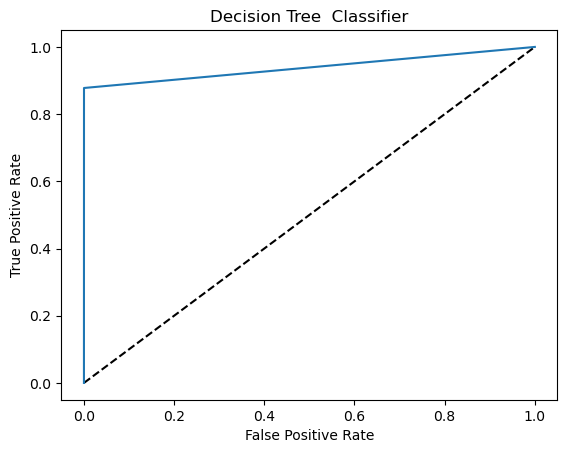

In [33]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=' Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree  Classifier')
plt.show()

In [35]:
score= roc_auc_score(y_test, dtc.predict(X_test))
print(score)

0.9388306626184546


# Saving the model

In [36]:
import pickle
filename='Fraud Detection.pkl'
pickle.dump(dtc,open(filename,"wb"))

# Conclusion

In [38]:
model=pickle.load(open('Fraud Detection.pkl',"rb"))
result=model.score(X_test,y_test)
print(result)

0.9997280994307377


In [40]:
conclusion=pd.DataFrame([model.predict(X_test)[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1272514,1272515,1272516,1272517,1272518,1272519,1272520,1272521,1272522,1272523
Predicted,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Original,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
